In [47]:
!pip install yfinance
!pip install plotly
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nbformat
!pip install matplotlib
!pip install xgboost

In [48]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot as plt
import xgboost as xgb

In [49]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker( ticker_symbol )
df = ticker.history( period = "5y" ).reset_index( drop = False )
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001,0,0.0,0.0
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0


In [50]:
df_clean = df.drop( columns = [ "Volume", "Dividends", "Stock Splits" ] )

df_clean

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1252,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003


# Ερώτημα 1

In [51]:
x_axis = df_clean[ "Date" ]

fig = go.Figure()

fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Open" ], mode = "lines+markers", name = "Open" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Close" ], mode = "lines+markers", name = "Close" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "High" ], mode = "lines+markers", name = "High" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_clean[ "Low" ], mode = "lines+markers", name = "Low" ) )

# Ερώτημα 2

Οι χρονοσειρές είναι προφανώς μη στατικές καθώς δεν ακολουθούν κάποιο μέσο όρο και αλλάζει συνεχώς η τυπική απόκλιση των δειγμάτων.

# Ερώτημα 3
Αν εκπαιδεύσουμε το μοντέλο στα συγκεκριμένα δεδομένα λογικά θα έχουμε αποκλίσεις. Βλέπουμε συγκεκριμένα το το 2021 ο μέσος όρος που επιδεικνύει το μοντέλο μας είναι σαφώς μικρότερος από το αντίστοιχο 2022 ή 2023.

# Ερώτημα 4
Μάλλον έχει να κάνει με τους δασμούς που είχαν σκοπό να εφαρμόσουν οι ΗΠΑ εκείνη την περίοδο.

# Ερώτημα 5
Είναι δυνατόν εφόσον έχει μοντελοποιηθεί ερπαρκώς η συνάρτηση μέσω της εκπαίδευσης. Πάλι όμως θα ήταν πολύ πιο χρήσιμο να μπορούσαμε να χρησιμοποιήσουμε τα δεδομένα και άλλα ημερών.

# Ερώτημα 6
Όχι δεν έχει νόημα καθώς θα θέλαμε να κρατήσουμε την χρονική σχέση των δεδομένων.

# Ερώτημα 7

In [52]:
mask_2024 = ( df_clean[ "Date" ] >= "2024-01-01" )
df_train = df_clean.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_clean.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

df_train.shape

(792, 4)

# Ερώτημα 8

In [53]:
def getDataFromWindow( data_x, data_y, window_size ):
	np_x = data_x.to_numpy()
	cols = data_x.shape[1]
	x = np.zeros( ( len( data_x ) - window_size, window_size*cols ) )
	for i in range( len( data_x ) - window_size ):
		for j in range( window_size ):
			for k in range( cols ):
				x[i, j*cols + k ] = np_x[i + j, k ]
	
	return x, data_y[ window_size: ].to_numpy()

x_temp, y_temp = getDataFromWindow( x_train, y_train, 3 )


# Ερώτημα 9
Εξαρτάται, αν θέλουμε προβλέψεις σε βάθος ημέρας τότε μας βολεύει ένα μικρό παράθυρο. Αντίθετα αν θέλουμε αποτελέσματα για βάθη χρόνου τότε θέλουμε μεγάλα παράθυρα.

# Ερώτημα 10
Η συνάρτηση έχει ήδη υλοποιηθεί οπότε απλά δημιουργούμε τα δεδομένα μας και επαληθεύουμε την ορθότητα τους

In [54]:
window = 5
x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

print( "Dimensions of x_train_data: ", x_train_data.shape )
print( "Dimensions of y_train_data: ", y_train_data.shape )
print( "First row of x_train_data: \n", x_train_data[ 0, : ] )
print( df_clean[:5] )
print( "First value of y_train_data: ", y_train_data[ 0 ] )

Dimensions of x_train_data:  (787, 20)
Dimensions of y_train_data:  (787,)
First row of x_train_data: 
 [93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]
                       Date       Open       High        Low      Close
0 2020-11-05 00:00:00-05:00  93.339996  93.550003  92.489998  92.529999
1 2020-11-06 00:00:00-05:00  92.570000  92.820000  92.180000  92.230003
2 2020-11-09 00:00:00-05:00  92.239998  92.959999  92.129997  92.730003
3 2020-11-10 00:00:00-05:00  92.760002  92.970001  92.599998  92.750000
4 2020-11-11 00:00:00-05:00  92.699997  93.209999  92.610001  93.040001
First value of y_train_data:  92.95999908447266


# Ερώτημα 11

In [55]:
from sklearn.metrics import mean_absolute_error


class TrainingResults:
    def __init__(self):
        self.training_data_accuracy = 0.
        self.test_data_accuracy = 0.

def modelTrain( model, x_train = x_train_data, y_train = y_train_data, x_test = x_test_data, y_test = y_test_data ):
    ret = TrainingResults()
    model.fit( x_train, y_train )
    ret.training_data_accuracy = mean_absolute_error( y_train, model.predict( x_train ) )
    ret.test_data_accuracy = mean_absolute_error( y_test, model.predict( x_test ) )

    return ret
    


Linear Regression Training Data Accuracy: 0.3454
Linear Regression Test Data Accuracy: 0.3358
Random Forest Training Data Accuracy: 0.1456
Random Forest Test Data Accuracy: 0.3965
Bagging with linear regressor Training Data Accuracy: 0.3454
Bagging with linear regressor Test Data Accuracy: 0.3327
Stacking Training Data Accuracy: 0.3576
Stacking Test Data Accuracy: 0.3378
XGBoost Training Data Accuracy: 0.0216
XGBoost Test Data Accuracy: 0.4439


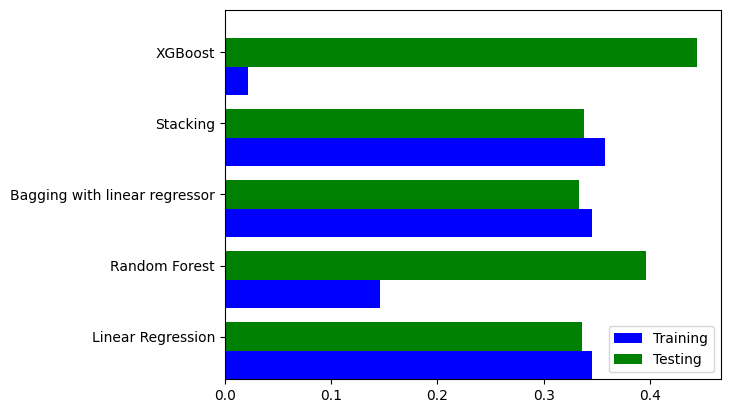

In [56]:
def printAccuracies( model_name, results ):
    print( f"{model_name} Training Data Accuracy: {results.training_data_accuracy:.4f}" )
    print( f"{model_name} Test Data Accuracy: {results.test_data_accuracy:.4f}" )

def modelsPredictions( x_train = x_train_data, y_train = y_train_data, x_test = x_test_data, y_test = y_test_data ):
    accuracies = []
    linear_model = LinearRegression( n_jobs = -1 )
    linear_results = modelTrain( linear_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Linear Regression", linear_results ) )

    random_forest_model = RandomForestRegressor( n_jobs = -1 )
    random_forest_results = modelTrain( random_forest_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Random Forest", random_forest_results ) )

    bagging_linear_model = BaggingRegressor( estimator = LinearRegression(), n_jobs = -1, n_estimators=100, max_features = 0.8 )
    bagging_linear_results = modelTrain( bagging_linear_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Bagging with linear regressor", bagging_linear_results ) )

    stacking_model = StackingRegressor( estimators = [("lr", LinearRegression()), ("rf", RandomForestRegressor())], n_jobs = -1 )
    stacking_results = modelTrain( stacking_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "Stacking", stacking_results ) )

    xgboost_model = xgb.XGBRegressor( n_jobs = -1 )
    xgboost_results = modelTrain( xgboost_model, x_train, y_train, x_test, y_test )
    accuracies.append( ( "XGBoost", xgboost_results ) )

    return accuracies

accuracies = modelsPredictions()

for acc in accuracies:
    printAccuracies( acc[0], acc[1] )
    
ind = np.arange(len(accuracies))
width = 0.4
fig, ax = plt.subplots()
ax.barh( ind, [ acc[1].training_data_accuracy for acc in accuracies ], width, color = 'blue', label = "Training" )
ax.barh( ind + width, [ acc[1].test_data_accuracy for acc in accuracies ], width, color = 'green', label = "Testing" )
ax.set(yticks=ind + width, yticklabels=[ acc[0] for acc in accuracies ], ylim=[2*width - 1, len(accuracies)])
ax.legend()

plt.show()


- Linear Regression: Σε αυτήν την περίπτωση προσπαθούμε να κάνουμε fit ένα υπερεπίπεδο στα δεδομένα και με βάση αυτό να βγάλουμε μία εκτίμηση.
- Random Forest: Διαλέγει τυχαία χαρακτηριστικά και φτιάχνει πολλά δέντρα, η τελική απόφαση βγαίνει μέσα από έναν μέσο όρο.
- Bagging with linear regressor: Διαλέγουμε πάλι τυχαία χαρακτηριστικά και φτιάχνουμε μοντέλα το τελικό αποτέλεσμα των οποίων εξαρτάται από το μέσο όρο, που βγάζουν.
- Stacking: Το stacking είναι μία τεχνική η οποία χτίζει πολλά μοντέλα και ένα τελικό, το οποίο συνδέεται στις εξόδους των μοντέλων. Το τελικό μοντέλο εκπαιδεύεται στις εξόδους των τελικών.
- XGBoost: Χρησιμοποιεί την Newton-Raphson για να βελτιστοποιήσει την εκπαίδευση ενός δέντρου. Σε κάθε επανάληψη ο αλγόριθμος μαθαίνει να διορθώνει σταδιακά τα σφάλματα της προηγούμενης επανάληψης

# Ερώτημα 12

## a)

Linear Regression Training Data Accuracy: 0.3429
Linear Regression Test Data Accuracy: 0.3424
Random Forest Training Data Accuracy: 0.1468
Random Forest Test Data Accuracy: 0.4052
Bagging with linear regressor Training Data Accuracy: 0.3437
Bagging with linear regressor Test Data Accuracy: 0.3394
Stacking Training Data Accuracy: 0.3551
Stacking Test Data Accuracy: 0.3437
XGBoost Training Data Accuracy: 0.0154
XGBoost Test Data Accuracy: 0.4827


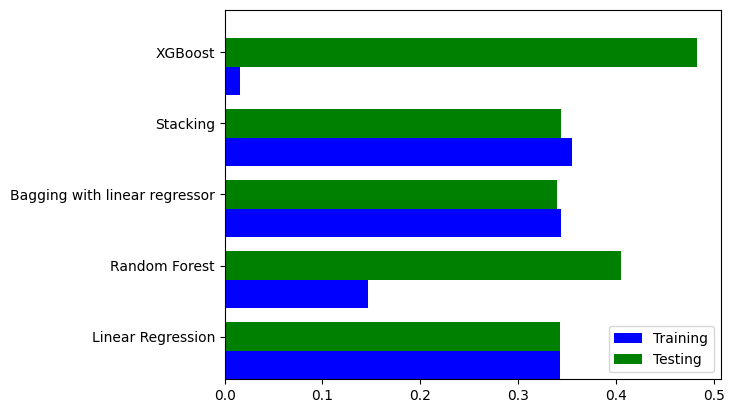

In [57]:
df_clean['DayOfWeek'] = df_clean['Date'].dt.dayofweek
df_clean['Month'] = df_clean['Date'].dt.month

df_train = df_clean.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_clean.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

accuracies = modelsPredictions( x_train_data, y_train_data, x_test_data, y_test_data )

for acc in accuracies:
    printAccuracies( acc[0], acc[1] )
    
ind = np.arange(len(accuracies))
width = 0.4
fig, ax = plt.subplots()
ax.barh( ind, [ acc[1].training_data_accuracy for acc in accuracies ], width, color = 'blue', label = "Training" )
ax.barh( ind + width, [ acc[1].test_data_accuracy for acc in accuracies ], width, color = 'green', label = "Testing" )
ax.set(yticks=ind + width, yticklabels=[ acc[0] for acc in accuracies ], ylim=[2*width - 1, len(accuracies)])
ax.legend()

plt.show()


# b)

                          Date      Open      High       Low     Close  \
1    2020-11-06 00:00:00-05:00 -0.008284 -0.007834 -0.003357 -0.003247   
2    2020-11-09 00:00:00-05:00 -0.003571  0.001507 -0.000543  0.005407   
3    2020-11-10 00:00:00-05:00  0.005622  0.000108  0.005089  0.000216   
4    2020-11-11 00:00:00-05:00 -0.000647  0.002578  0.000108  0.003122   
5    2020-11-12 00:00:00-05:00  0.003339 -0.000751  0.001834 -0.000860   
...                        ...       ...       ...       ...       ...   
1252 2025-10-29 00:00:00-04:00 -0.000101  0.004135  0.000507  0.005356   
1253 2025-10-30 00:00:00-04:00  0.004043  0.003617  0.003037  0.003119   
1254 2025-10-31 00:00:00-04:00  0.003524  0.001203  0.005042  0.002709   
1255 2025-11-03 00:00:00-05:00  0.002610  0.001501  0.002913  0.000701   
1256 2025-11-05 00:00:00-05:00  0.004302  0.003694  0.003494  0.002959   

      DayOfWeek  Month  
1           4.0   11.0  
2           0.0   11.0  
3           1.0   11.0  
4          

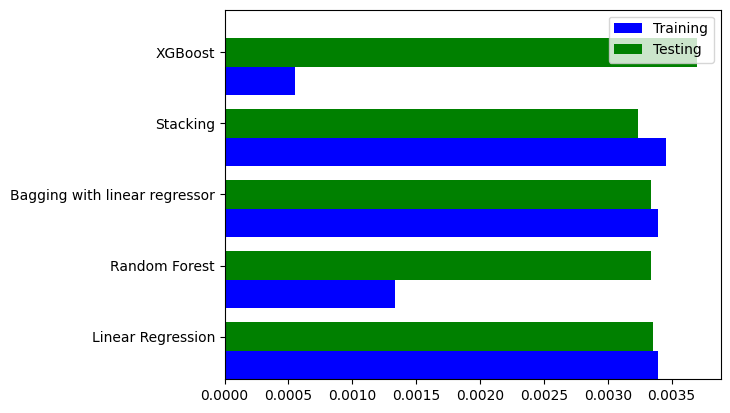

In [58]:
df_log_returns = df_clean.copy()
for col in ['Open', 'High', 'Low', 'Close']:
    df_log_returns[col] = np.log(1 + df_log_returns[col].pct_change())
    # df_log_returns[col] = df_log_returns[col]


for col in df_log_returns.columns:
    df_log_returns[col] = df_log_returns[col][1:]

df_log_returns = df_log_returns.iloc[1:]
print( df_log_returns )
df_train = df_log_returns.drop( columns = ["Date"] ).loc[ ~mask_2024 ]
df_test = df_log_returns.drop( columns = ["Date"] ).loc[ mask_2024 ]

y_train = df_train[ "Close" ]
y_test = df_test[ "Close" ]
x_train = df_train
x_test = df_test

x_train_data, y_train_data = getDataFromWindow( x_train, y_train, window )
x_test_data, y_test_data = getDataFromWindow( x_test, y_test, window )

accuracies = modelsPredictions( x_train_data, y_train_data, x_test_data, y_test_data )

for acc in accuracies:
    printAccuracies( acc[0], acc[1] )
    
ind = np.arange(len(accuracies))
width = 0.4
fig, ax = plt.subplots()
ax.barh( ind, [ acc[1].training_data_accuracy for acc in accuracies ], width, color = 'blue', label = "Training" )
ax.barh( ind + width, [ acc[1].test_data_accuracy for acc in accuracies ], width, color = 'green', label = "Testing" )
ax.set(yticks=ind + width, yticklabels=[ acc[0] for acc in accuracies ], ylim=[2*width - 1, len(accuracies)])
ax.legend()

plt.show()

In [59]:
x_axis = df_clean[ "Date" ]

fig = go.Figure()

fig.add_trace( go.Scatter( x = x_axis, y = df_log_returns[ "Open" ], mode = "lines+markers", name = "Open" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_log_returns[ "Close" ], mode = "lines+markers", name = "Close" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_log_returns[ "High" ], mode = "lines+markers", name = "High" ) )
fig.add_trace( go.Scatter( x = x_axis, y = df_log_returns[ "Low" ], mode = "lines+markers", name = "Low" ) )

Φαίνεται ότι το μοντέλο προβλέπει καλύτερα με την λογαριθμική κλίμακα. Αυτό έχει να κάνει κυρίως ότι οι ποσότητες τώρα είναι γύρω από το 0 και έχουμε κωδικοποιήσει μόνο τις διαφορές με την προηγούμενη ποσότητα.